## 437. Path Sum III

<div class="elfjS" data-track-load="description_content"><p>Given the <code>root</code> of a binary tree and an integer <code>targetSum</code>, return <em>the number of paths where the sum of the values&nbsp;along the path equals</em>&nbsp;<code>targetSum</code>.</p>

<p>The path does not need to start or end at the root or a leaf, but it must go downwards (i.e., traveling only from parent nodes to child nodes).</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/04/09/pathsum3-1-tree.jpg" style="width: 450px; height: 386px;">
<pre><strong>Input:</strong> root = [10,5,-3,3,2,null,11,3,-2,null,1], targetSum = 8
<strong>Output:</strong> 3
<strong>Explanation:</strong> The paths that sum to 8 are shown.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre><strong>Input:</strong> root = [5,4,8,11,null,13,4,7,2,null,null,5,1], targetSum = 22
<strong>Output:</strong> 3
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li>The number of nodes in the tree is in the range <code>[0, 1000]</code>.</li>
	<li><code>-10<sup>9</sup> &lt;= Node.val &lt;= 10<sup>9</sup></code></li>
	<li><code>-1000 &lt;= targetSum &lt;= 1000</code></li>
</ul>
</div>

In [1]:
import numpy as np
from typing import List, Optional
%load_ext memory_magics

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [2]:
from graphviz import Digraph
from collections import deque 

def build_tree(values):
    if not values:
        return None
    iter_values = iter(values)
    root = TreeNode(next(iter_values))
    queue = deque([root])
    while queue:
        node = queue.popleft()
        try:
            left_val = next(iter_values)
            if left_val is not None:
                node.left = TreeNode(left_val)
                queue.append(node.left)
            right_val = next(iter_values)
            if right_val is not None:
                node.right = TreeNode(right_val)
                queue.append(node.right)
        except StopIteration:
            break
    return root

def plot_tree(node, graph=None, node_id=0):
    if graph is None:
        graph = Digraph()
        graph.attr(size='8,8')
    if node is not None:
        graph.node(str(node_id), str(node.val))
        if node.left:
            graph.edge(str(node_id), str(2 * node_id + 1))
            plot_tree(node.left, graph, 2 * node_id + 1)
        if node.right:
            graph.edge(str(node_id), str(2 * node_id + 2))
            plot_tree(node.right, graph, 2 * node_id + 2)
    return graph

## Solution 1

In [3]:
class Solution:
    def pathSum(self, root: Optional[TreeNode], targetSum: int) -> int:
        def dfs(node, currentSum, pathCount):
            if not node:
                return 0
            
            currentSum += node.val
            count = pathCount.get(currentSum - targetSum, 0)
            pathCount[currentSum] = pathCount.get(currentSum, 0) + 1
            
            count += dfs(node.left, currentSum, pathCount)
            count += dfs(node.right, currentSum, pathCount)
            
            pathCount[currentSum] -= 1  # Remove the current node's sum from the pathCount
            return count
        
        pathCount = {0: 1}  # To handle the case when currentSum equals targetSum
        return dfs(root, 0, pathCount)

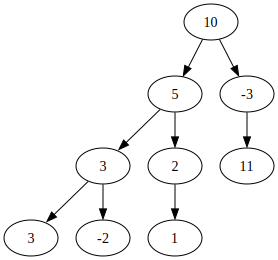

In [4]:
tree1 = build_tree(iter([10,5,-3,3,2,None,11,3,-2,None,1]))
plot_tree(tree1)

In [5]:
%%time
solution = Solution()
solution.pathSum(tree1,8)

CPU times: user 33 µs, sys: 3 µs, total: 36 µs
Wall time: 38.9 µs


3